# Spam/Ham Classification using NLP

In [1]:
import nltk
import pandas as pd
import numpy as np

In [2]:
dataset= pd.read_csv("SMSSpamCollection.tsv",sep="\t",header=None)
dataset.columns=['label','body_text']
dataset.head()

,label,body_text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [3]:
dataset['body_text'][0]

"I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times."

In [4]:
dataset['body_text'][1]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [5]:
print("Input data has {} rows and {} columns".format(len(dataset),len(dataset.columns)))

Input data has 5568 rows and 2 columns


In [6]:
print("Out of {} rows, {} are spam. {} are ham".format(len(dataset),len(dataset[dataset['label']=='spam']),
                                                      len(dataset[dataset['label']=='ham'])))

Out of 5568 rows, 746 are spam. 4822 are ham


In [7]:
print("Number of null in label: {}".format(dataset['label'].isnull().sum()))

print("Number of null in text: {}".format(dataset['body_text'].isnull().sum()))

Number of null in label: 0
Number of null in text: 0


Data Preprocessing and Count Vectorization

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
import string
import re
from nltk.corpus import stopwords
 
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))
wn=nltk.WordNetLemmatizer()

def clean_text(text):
    text="".join([word.lower() for word in text if word not in string.punctuation])
    tokens=re.split('\W',text)
    text=[wn.lemmatize(word) for word in tokens if word not in stopwords]
    return text

count_vect= CountVectorizer(analyzer=clean_text)

X_count=count_vect.fit_transform(dataset['body_text'])

print(X_count.shape)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aadhi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


(5568, 8914)


In [9]:
import warnings
warnings.filterwarnings("ignore")

x_counts_df = pd.DataFrame(X_count.toarray())
x_counts_df.columns = count_vect.get_feature_names_out()
x_counts_df

,,0,008704050406,0089my,0121,01223585236,01223585334,0125698789,02,020603,...,zindgi,zoe,zogtorius,zoom,zouk,zyada,é,ü,üll,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5563,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5564,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5565,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5566,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


TF-IDF Vectorizer

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect=TfidfVectorizer(analyzer=clean_text)
X_tfidf= tfidf_vect.fit_transform(dataset['body_text'])

print(X_tfidf.shape)

(5568, 8914)


In [11]:
x_tfidf_df= pd.DataFrame(X_tfidf.toarray())
x_tfidf_df.columns=tfidf_vect.get_feature_names_out()
x_tfidf_df

,,0,008704050406,0089my,0121,01223585236,01223585334,0125698789,02,020603,...,zindgi,zoe,zogtorius,zoom,zouk,zyada,é,ü,üll,〨ud
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5563,0.092390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
5564,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.329062,0.0,0.0
5565,0.145545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
5566,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [12]:
# Feature Engineering: Feature Creation

In [13]:
dataset=pd.read_csv("SMSSpamCollection.tsv",sep="\t",header=None)

dataset.columns=['label','body_text']

dataset.head()

,label,body_text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [14]:
dataset['body_len']=dataset["body_text"].apply(lambda x:len(x)-x.count(" "))

dataset.head()

,label,body_text,body_len
0,ham,I've been searching for the right words to tha...,160
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128
2,ham,"Nah I don't think he goes to usf, he lives aro...",49
3,ham,Even my brother is not like to speak with me. ...,62
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28


In [15]:
def count_punct(text):
    count=sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text)-text.count(" ")),3)*100

dataset['punct%']=dataset['body_text'].apply(lambda x:count_punct(x))

dataset.head()

,label,body_text,body_len,punct%
0,ham,I've been searching for the right words to tha...,160,2.5
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
2,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1
3,ham,Even my brother is not like to speak with me. ...,62,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1


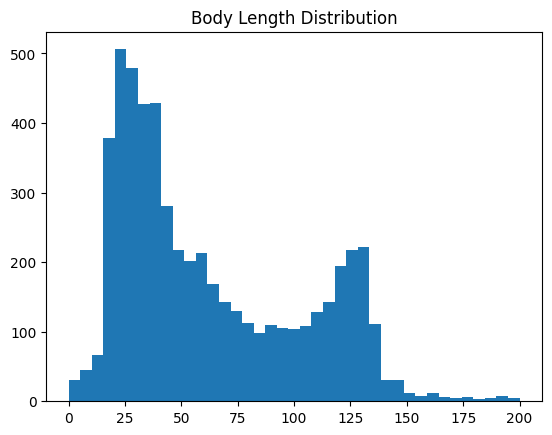

In [16]:
import matplotlib.pyplot as plt
import numpy as np

bins=np.linspace(0,200,40)

plt.hist(dataset['body_len'],bins)
plt.title('Body Length Distribution')
plt.show()

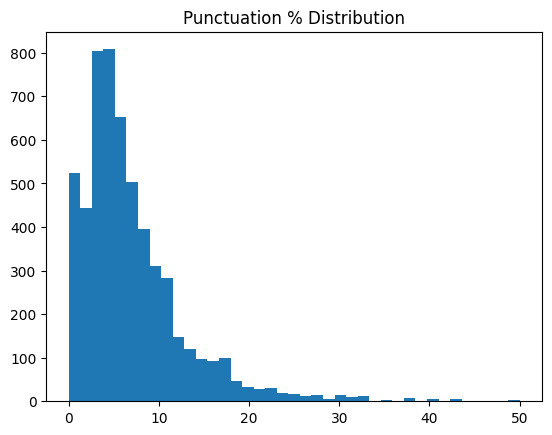

In [17]:
bins=np.linspace(0,50,40)

plt.hist(dataset['punct%'],bins)
plt.title('Punctuation % Distribution')
plt.show()

# Building ML Model using Random Forest

In [18]:
import nltk
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import string

In [19]:
dataset=pd.read_csv("SMSSpamCollection.tsv",sep="\t",header=None)
dataset.columns=['label','body_text']
dataset.head()

,label,body_text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [20]:
def count_punct(text):
    count=sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text)-text.count(" ")),3)*100

dataset['body_len']=dataset["body_text"].apply(lambda x:len(x)-x.count(" ")) # 1st Feature, based on body text length
dataset['punct%']=dataset['body_text'].apply(lambda x:count_punct(x)) # 2nd Feature, based on percentage of punctuation in body text

dataset.head()

,label,body_text,body_len,punct%
0,ham,I've been searching for the right words to tha...,160,2.5
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
2,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1
3,ham,Even my brother is not like to speak with me. ...,62,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1


In [21]:
def clean_text(text):
    text="".join([word.lower() for word in text if word not in string.punctuation])
    tokens=re.split('\W',text)
    text=[wn.lemmatize(word) for word in tokens if word not in stopwords]
    return text

tfidf_vect=TfidfVectorizer(analyzer=clean_text)
X_tfidf=tfidf_vect.fit_transform(dataset['body_text'])

In [22]:
X_features=pd.concat([dataset['body_len'],dataset['punct%'],pd.DataFrame(X_tfidf.toarray())],axis=1)
X_features.head()
X_features.columns = X_features.columns.astype(str)

In [23]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import KFold, cross_val_score

rf=RandomForestClassifier(n_jobs=1)
k_fold=KFold(n_splits=5)

cross_val_score(rf, X_features, dataset['label'],cv=k_fold, scoring='accuracy',n_jobs=1)

array([0.98025135, 0.97845601, 0.97396768, 0.96585804, 0.97304582])

In [24]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split
import joblib

In [25]:
X_train, X_test, y_train, y_test= train_test_split(X_features, dataset['label'],test_size=0.3,random_state=0)

In [26]:
rf=RandomForestClassifier(n_estimators=500, max_depth=20, n_jobs=-1)
rf_model=rf.fit(X_train, y_train)
joblib.dump(rf_model, 'rf_model.pkl')
joblib.dump(tfidf_vect, 'tfidf_vect.pkl')

['tfidf_vect.pkl']

In [27]:
sorted(zip(rf_model.feature_importances_,X_train.columns),reverse=True)[0:10]

[(0.04998838475423422, 'body_len'),
 (0.03681472184819215, '1900'),
 (0.030749039623470677, '3422'),
 (0.02925664597372884, '8103'),
 (0.024355158612022938, '5242'),
 (0.023736803986132347, '2155'),
 (0.021356507254445704, '7751'),
 (0.020004142473093487, '6918'),
 (0.017017814824915142, '6255'),
 (0.016942778876498782, '7439')]

In [28]:
y_pred= rf_model.predict(X_test)

precision, recall, fscore, support=score(y_test, y_pred, pos_label='spam',average='binary')

In [29]:
print('Precision {} / Recall {} / Accuracy {}'.format(round(precision,3),
                                                     round(recall,3),
                                                     round((y_pred==y_test).sum()/len(y_pred),3)))

Precision 1.0 / Recall 0.572 / Accuracy 0.938


In [30]:

import pandas as pd
import string
import re
from nltk.corpus import stopwords as nltk_stopwords
from nltk.stem import WordNetLemmatizer



# Initialize the lemmatizer and stopwords
wn = WordNetLemmatizer()
stopwords = set(nltk_stopwords.words('english'))

def clean_text(text):
    # Remove punctuation and convert to lowercase
    text = "".join([char.lower() for char in text if char not in string.punctuation])
    tokens = re.split('\W+', text)
    # Lemmatize words and remove stopwords
    text = [wn.lemmatize(word) for word in tokens if word not in stopwords]
    return text

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count / (len(text) - text.count(" ")), 3) * 100

def spam_ham_predictor(input_text):
    # Load the saved model and vectorizer
    rf_model = joblib.load('rf_model.pkl')
    tfidf_vect = joblib.load('tfidf_vect.pkl')
    
    # Vectorize the input text
    input_text_vectorized = tfidf_vect.transform([input_text]).toarray()
    
    # Extract manually defined features
    input_features = [len(input_text) - input_text.count(" "), count_punct(input_text)]
    
    # Combine vectorized text features with manually extracted features
    input_combined_features = pd.concat([pd.DataFrame(input_features).T, pd.DataFrame(input_text_vectorized)], axis=1)
    
    # Predict using the trained model
    prediction = rf_model.predict(input_combined_features)
    
    expression_check(prediction[0])
def expression_check(prediction_input):
    if prediction_input == "ham":
        print("The message is Ham")
    elif prediction_input == "spam":
        print("The message is Spam")
    else:
        print("Invalid Statement")

# Test the function
message = input("Enter a message: ")
spam_ham_predictor(message)


Enter a message:  URGENT! You have won a 1 week FREE membership in our £100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18


The message is Spam
